In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('covid.csv')
data

,no,pc,wbc,mc,ast,bc,ldh,diagnosis
0,1,Low,Low,Low,High,Normal,Normal,True
1,2,Low,Low,Normal,High,Normal,High,True
2,3,Low,High,Normal,High,Normal,Normal,False
3,4,Low,High,Normal,High,High,Normal,True
4,5,Low,Normal,High,High,Normal,Normal,False
5,6,Low,Normal,Normal,High,Normal,High,True
6,7,Normal,Low,Low,High,Normal,Normal,True
7,8,Normal,High,Normal,High,Normal,Normal,False
8,9,Normal,High,Normal,High,High,High,True
9,10,Normal,Normal,High,High,Normal,Normal,False


In [3]:
from sklearn import preprocessing

C:\Users\riyaj\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
le = preprocessing.LabelEncoder()

In [5]:
pc_encoded = le.fit_transform(data['pc'].values)
wbc_encoded = le.fit_transform(data['wbc'].values)
mc_encoded = le.fit_transform(data['mc'].values)
ast_encoded = le.fit_transform(data['ast'].values)
bc_encoded = le.fit_transform(data['bc'].values)
ldh_encoded = le.fit_transform(data['ldh'].values)

In [6]:
y = le.fit_transform(data['diagnosis'].values)

In [7]:
x = np.array(list(zip(pc_encoded,wbc_encoded,mc_encoded,ast_encoded,bc_encoded,ldh_encoded)))

In [8]:
x

array([[1, 1, 1, 0, 1, 1],
       [1, 1, 2, 0, 1, 0],
       [1, 0, 2, 0, 1, 1],
       [1, 0, 2, 0, 0, 1],
       [1, 2, 0, 0, 1, 1],
       [1, 2, 2, 0, 1, 0],
       [2, 1, 1, 0, 1, 1],
       [2, 0, 2, 0, 1, 1],
       [2, 0, 2, 0, 0, 0],
       [2, 2, 0, 0, 1, 1],
       [2, 2, 0, 0, 1, 0],
       [0, 1, 1, 1, 1, 1],
       [0, 2, 0, 1, 1, 1],
       [0, 2, 0, 1, 0, 0],
       [0, 0, 2, 1, 1, 0],
       [1, 2, 0, 0, 0, 1],
       [2, 2, 0, 0, 0, 1],
       [0, 1, 1, 1, 1, 0],
       [2, 2, 2, 0, 1, 1],
       [2, 0, 2, 0, 1, 0],
       [2, 1, 2, 0, 1, 0],
       [1, 0, 2, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [0, 0, 2, 1, 1, 1],
       [0, 2, 2, 1, 1, 1]])

In [9]:
y

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0], dtype=int64)

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
model = MultinomialNB()

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y)

In [13]:
model.fit(X_train, y_train)

MultinomialNB()

In [14]:
y_pred = model.predict(X_test)

In [15]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.7142857142857143


In [16]:
print("Classification Report: ")
print(classification_report(y_test,y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.60      1.00      0.75         3

    accuracy                           0.71         7
   macro avg       0.80      0.75      0.71         7
weighted avg       0.83      0.71      0.70         7



In [17]:
probs = model.predict_proba(X_test)

In [18]:
type(probs)

numpy.ndarray

In [19]:
probs

array([[0.50072143, 0.49927857],
       [0.31035181, 0.68964819],
       [0.17055269, 0.82944731],
       [0.33577969, 0.66422031],
       [0.51542666, 0.48457334],
       [0.42693538, 0.57306462],
       [0.21148171, 0.78851829]])

In [20]:
probs = probs[:,1]

In [21]:
probs

array([0.49927857, 0.68964819, 0.82944731, 0.66422031, 0.48457334,
       0.57306462, 0.78851829])

In [23]:
from sklearn.metrics import roc_curve
lr_fpr, lr_tpr, _ = roc_curve(y_test, probs)

In [24]:
lr_fpr

array([0., 0., 0., 1.])

In [25]:
lr_tpr

array([0.        , 0.33333333, 1.        , 1.        ])

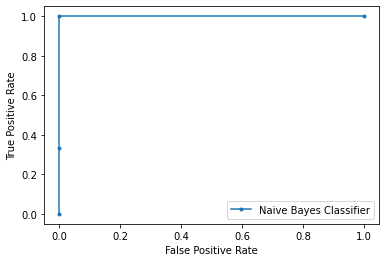

In [26]:
import matplotlib.pyplot as plt
plt.plot(lr_fpr, lr_tpr, marker ='.', label='Naive Bayes Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()